## Monitoring rowing trainings

Since i've recently bought the Suunto 5 peak sports watch i've been gathering data from my team's trainings. This data can be exported into a GPX file. My intention in this notebook is to do some data analysis on my own trainings and see if I can get some relevant information for my team

![Equipo](Team.jpg)

In [120]:
import folium
import gpxpy
import gpxplotter as gpx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil import tz
import seaborn as sns
import shapefile as shp

In [121]:
#For track made that day
the_map = gpx.create_folium_map()
for track in gpx.read_gpx_file('suuntoapp-Rowing-2023-07-18T18-09-05Z-track.gpx'):
    for i, segment in enumerate(track['segments']):
        gpx.add_segment_to_map(the_map, segment)
the_map

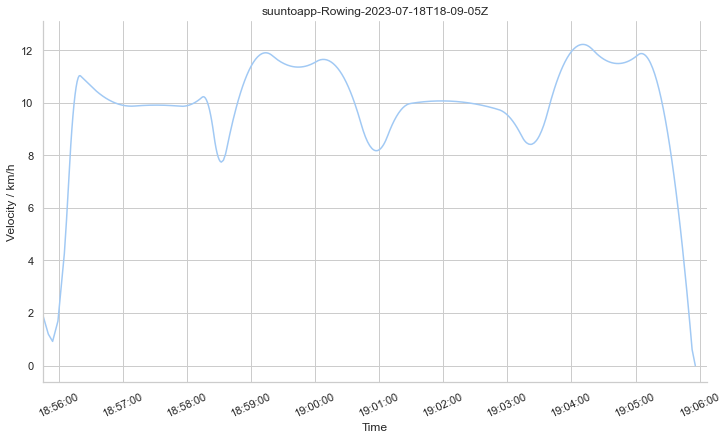

In [141]:
training = gpx.read_gpx_file("suuntoapp-Rowing-2023-07-18T18-09-05Z-track.gpx")
for track in training:
    tresCiabogasTraining = track
    for i, segment in enumerate(tresCiabogasTraining["segments"]):
        # Plot elevation as function of distance, color by heart rate:
        fig, ax = gpx.plot_line(
            tresCiabogasTraining, segment, xvar="time", yvar="Velocity / km/h"
        )
        ax.set_xlim(datetime.datetime(2023, 7, 18, 18, 55, 45, tzinfo=tz.tzutc()), datetime.datetime(2023, 7, 18, 19, 6, 7, tzinfo=tz.tzutc()))
        sns.despine(fig=fig)
        break

In [201]:
gpx_file = open('suuntoapp-Rowing-2023-07-18T18-09-05Z-track.gpx', 'r')   # open the file in read mode
gpx_data = gpxpy.parse(gpx_file)
gpx_points = gpx_data.tracks[0].segments[0].points

df = pd.DataFrame(columns=['lon', 'lat', 'elev', 'time']) # create a new Pandas dataframe object with give column names

# loop through the points and append their attributes to the dataframe
for point in gpx_points:
    df = df.append({'lon' : point.longitude, 'lat' : point.latitude, 'elev' : point.elevation, 'time' : point.time}, ignore_index=True)

df

,lon,lat,elev,time
0,-4.308972,36.713158,-19.2,2023-07-18 18:09:08+00:00
1,-4.308972,36.713158,-19.2,2023-07-18 18:09:08+00:00
2,-4.308987,36.713135,-19.2,2023-07-18 18:09:10+00:00
3,-4.309007,36.713103,-19.2,2023-07-18 18:09:12+00:00
4,-4.309020,36.713080,-19.2,2023-07-18 18:09:14+00:00
...,...,...,...,...
1333,-4.310158,36.711635,-1.0,2023-07-18 19:05:46+00:00
1334,-4.310140,36.711643,-1.0,2023-07-18 19:05:48+00:00
1335,-4.310117,36.711660,-1.0,2023-07-18 19:05:51+00:00
1336,-4.310105,36.711677,-0.8,2023-07-18 19:05:53+00:00


In [202]:
#Filter the zone of interest
df['time'] = df['time'].apply(lambda x: str(x)[:19])
df['time'] = pd.to_datetime(df['time'])
start = datetime.datetime.strptime('2023-07-18 18:55:45', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('2023-07-18 19:06:00', '%Y-%m-%d %H:%M:%S')
df['time'] = df[df['time'] > start]
df

,lon,lat,elev,time
0,-4.308972,36.713158,-19.2,NaN
1,-4.308972,36.713158,-19.2,NaN
2,-4.308987,36.713135,-19.2,NaN
3,-4.309007,36.713103,-19.2,NaN
4,-4.309020,36.713080,-19.2,NaN
...,...,...,...,...
1333,-4.310158,36.711635,-1.0,-4.310158
1334,-4.310140,36.711643,-1.0,-4.31014
1335,-4.310117,36.711660,-1.0,-4.310117
1336,-4.310105,36.711677,-0.8,-4.310105
